In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import PIL
from datetime import datetime

In [67]:
cand = pd.read_csv('data/candidatos.csv')
votos = pd.read_csv('data/votos.csv')

In [68]:
votos['date'] = votos['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
votos['ano'] = votos['date'].apply(lambda x:x.year)

In [69]:
df = pd.merge(cand[['ano', 'candidato_id', 'partido']],
                votos, on=['candidato_id', 'ano'], how='inner')

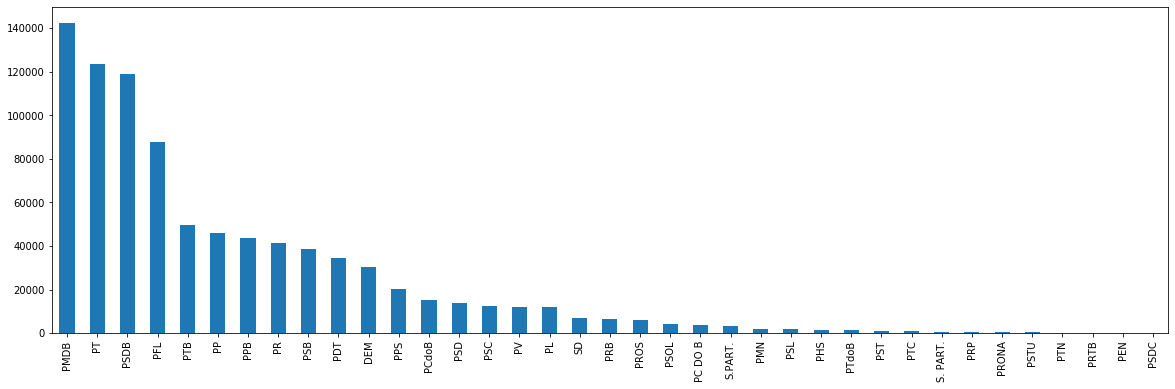

In [70]:
plt.figure(figsize=(20,6))
df['partido'].value_counts().plot(kind="bar")
plt.show()

In [71]:
partido_cont = df['partido'].value_counts()
mfp = partido_cont[partido_cont > 10000].index.values.tolist()
df = df[df['partido'].isin(mfp)]

In [72]:
v = pd.pivot_table(df, values='voto', index=['candidato_id', 'partido'], columns='sessao_id', fill_value=0)

In [73]:
part = v.reset_index().drop('candidato_id', axis=1).groupby('partido').mean()

In [74]:
part

sessao_id,01/1991,011/2001,052/1999,071/98,08/99,09/99,1/95,10/99,101/2003,102/95,...,914/95,9261/2013,940/2007,9459/2014,95/96,9534/2014,9556/2014,96/92,981/2008,998/2001
partido,,,,,,,,,,,,,,,,,,,,,
DEM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.223684,0.013158,0.236842,0.000000,-0.092105,0.171053,0.000000,0.447368,0.000000
PCdoB,0.250000,0.321429,0.000000,0.000000,-0.169643,-0.303571,0.000000,-0.107143,0.071429,0.000000,...,0.000000,0.321429,0.392857,0.321429,0.000000,0.059524,0.285714,0.016986,-0.053571,0.357143
PDT,0.134146,0.207317,0.000000,-0.182927,-0.054878,-0.201220,0.019309,-0.199187,0.012195,-0.207317,...,-0.256098,0.073171,0.158537,0.182927,-0.158537,-0.081301,0.109756,-0.019700,0.134146,0.182927
PFL,0.236453,-0.044335,-0.029557,0.305419,0.264778,0.009852,-0.135888,0.313629,0.224138,0.470443,...,-0.029557,0.000000,0.000000,0.000000,0.330049,0.000000,0.000000,0.036978,0.000000,-0.300493
PL,0.405405,0.081081,0.000000,0.054054,0.250000,-0.216216,-0.029655,0.117117,0.094595,0.256757,...,-0.135135,0.000000,0.000000,0.000000,0.040541,0.000000,0.000000,0.025890,0.000000,0.027027
PMDB,0.146259,-0.044218,0.003401,0.112245,0.113946,-0.006803,0.006911,0.139456,0.083333,0.183673,...,-0.102041,0.095238,0.173469,0.163265,0.136054,-0.048753,0.159864,0.030212,0.187075,-0.190476
PP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.191176,0.000000,...,0.000000,0.147059,0.196078,0.186275,0.000000,-0.032680,0.225490,0.000000,0.142157,0.000000
PPB,0.223214,-0.196429,-0.008929,0.285714,0.200893,-0.017857,-0.108472,0.321429,0.000000,0.616071,...,-0.392857,0.000000,0.000000,0.000000,0.236607,0.000000,0.000000,0.051045,0.000000,-0.232143
PPS,0.137255,0.078431,0.000000,-0.098039,0.000000,-0.176471,-0.010893,-0.117647,0.107843,-0.009804,...,-0.078431,0.058824,0.137255,0.137255,0.000000,-0.039216,0.078431,0.048063,0.137255,0.117647


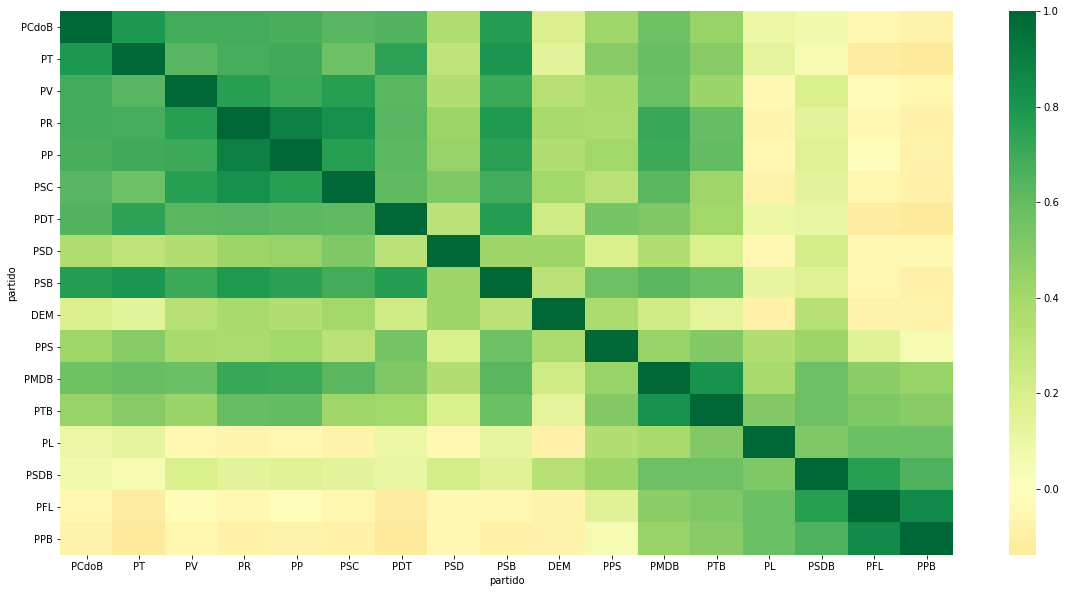

In [85]:
plt.figure(figsize=(20,10))
part['x'] = PCA(1).fit_transform(part)
part.sort_values('x', ascending=True, inplace=True)
part.drop('x', axis=1, inplace=True)
sns.heatmap(part.T.corr(), cmap='RdYlGn', center=0)

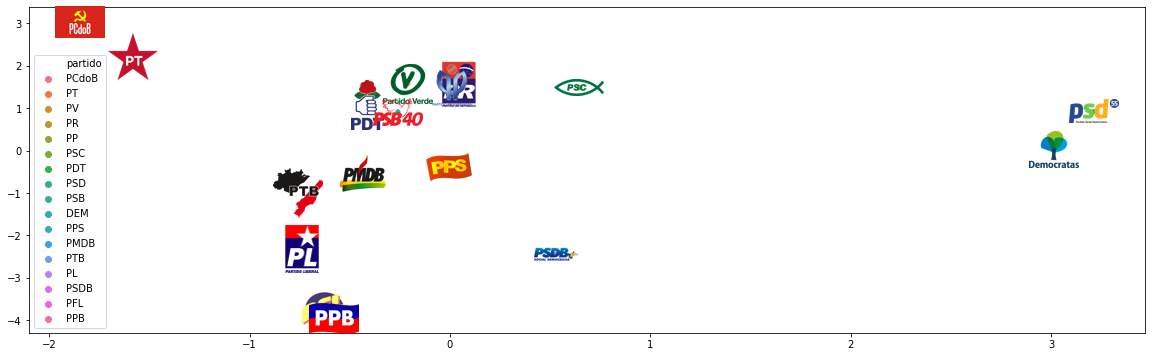

In [84]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import PIL
import glob

x, y = PCA(2).fit_transform(part).T
fig, ax = plt.subplots(figsize=(20, 6))

def getImage(partido):
    p = partido.upper().replace(' ', '')
    path = glob.glob(f"../logos/{p}.*")[0]
    img = PIL.Image.open(path)
    img.thumbnail((50, 50))
    return OffsetImage(img)

sns.scatterplot(y, -x, hue=part.index)
for x0, y0, path in zip(y, -x, part.index.tolist()):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

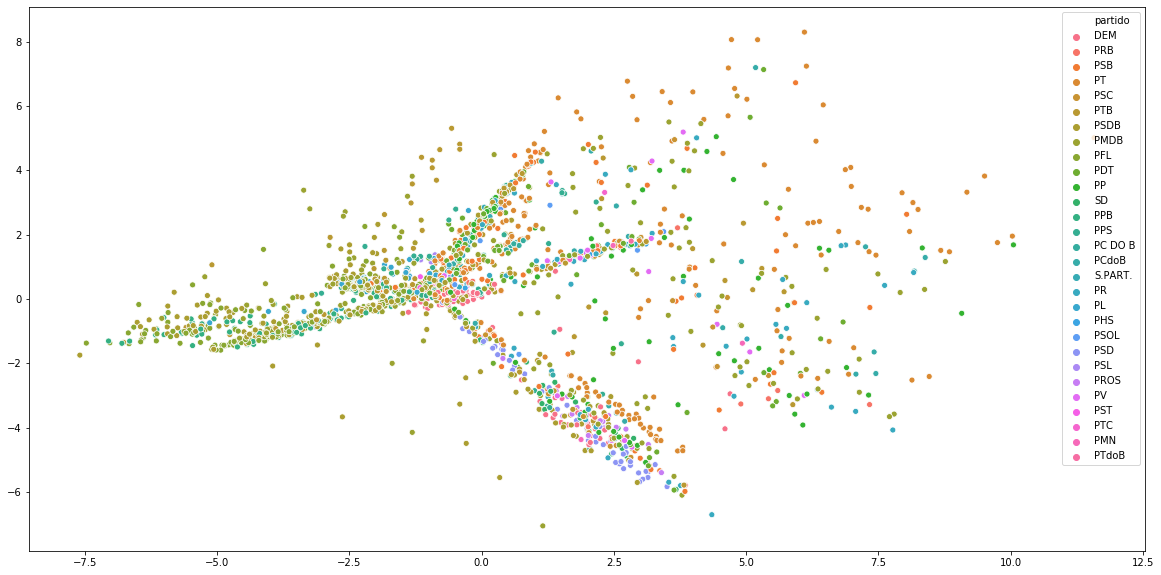

In [66]:
x, y = PCA(2).fit_transform(v).T

plt.figure(figsize=(20,10))
partido = v.index.get_level_values('partido')
sns.scatterplot(x, y, hue=partido)